<a href="https://colab.research.google.com/github/ramolefeg/cv/blob/master/Future_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Future Sales Prediction with Machine Learning

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")


In [10]:
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [11]:
#Check if the data contains some nulls
print(data.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


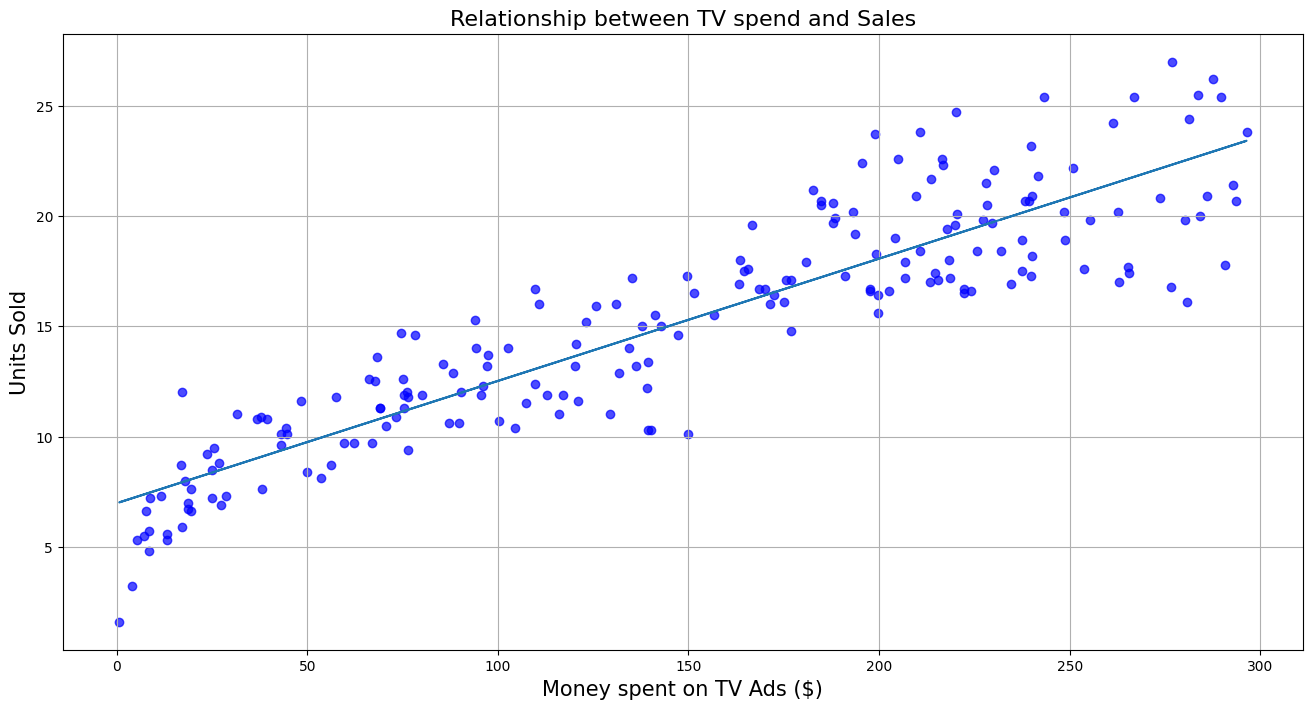

In [17]:
# prompt: Now let’s visualize the relationship between the amount spent on advertising on TV and units sold

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(
    data["TV"],
    data["Sales"],
    c="blue",
    marker="o",
    alpha=0.7,
)

plt.xlabel("Money spent on TV Ads ($)", fontsize=15)
plt.ylabel("Units Sold", fontsize=15)
plt.title("Relationship between TV spend and Sales", fontsize=16)


#calculate equation for trendline
z = np.polyfit( data["TV"], data["Sales"], 1)
p = np.poly1d(z)

plt.plot(data["TV"], p(data["TV"]))
#add trendline to plot
#plt.plot(x, p(data["TV"]))
plt.grid(True)
plt.show()


In [19]:
import plotly.express as px
figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

In [20]:
import plotly.express as px
#import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [21]:
import plotly.express as px
#import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

In [22]:
# prompt:  Now let’s have a look at the correlation of all the columns with the sales column

data.corr()["Sales"].sort_values(ascending=False)


Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

# Future Sales Prediction Model

In [30]:
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


**Training the Model **

In [32]:
#training  the model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9059011844150826


In [33]:
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

